## Load libraries and dataset

In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [403]:
flight=pd.read_csv(r"C:\Users\ASHWINI\OneDrive\Documents\IT Vedant Excel DataScience&Analytics with AI\ML+Project\flight_delay_predict.csv")

In [405]:
flight.shape

(1048575, 20)

# Reading Data

In [407]:
flight

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
0,1,2014,1,1,1,3,01-01-2014,UA,LAX,CA,ORD,IL,900,0,0,1744,7,43.0,43,218
1,0,2014,1,1,1,3,01-01-2014,AA,IAH,TX,DFW,TX,1750,0,0,224,1,2.0,2,50
2,1,2014,1,1,1,3,01-01-2014,AA,LAX,CA,ORD,IL,1240,0,0,1744,7,26.0,26,220
3,1,2014,1,1,1,3,01-01-2014,AA,DFW,TX,LAX,CA,1905,0,0,1235,5,159.0,159,169
4,0,2014,1,1,1,3,01-01-2014,AA,DFW,TX,CLT,NC,1115,0,0,936,4,-13.0,0,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,2017,2,4,15,6,15-04-2017,OO,IAH,TX,DFW,TX,1535,0,0,224,1,-15.0,0,45
1048571,0,2017,2,4,15,6,15-04-2017,OO,DFW,TX,SFO,CA,745,0,0,1464,6,-28.0,0,203
1048572,0,2017,2,4,15,6,15-04-2017,AA,CLT,NC,LAX,CA,735,0,0,2125,9,-27.0,0,277
1048573,0,2017,2,4,15,6,15-04-2017,AA,ORD,IL,DFW,TX,840,0,0,802,4,-33.0,0,110


In [409]:
flight.head() #It display first five row 

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
0,1,2014,1,1,1,3,01-01-2014,UA,LAX,CA,ORD,IL,900,0,0,1744,7,43.0,43,218
1,0,2014,1,1,1,3,01-01-2014,AA,IAH,TX,DFW,TX,1750,0,0,224,1,2.0,2,50
2,1,2014,1,1,1,3,01-01-2014,AA,LAX,CA,ORD,IL,1240,0,0,1744,7,26.0,26,220
3,1,2014,1,1,1,3,01-01-2014,AA,DFW,TX,LAX,CA,1905,0,0,1235,5,159.0,159,169
4,0,2014,1,1,1,3,01-01-2014,AA,DFW,TX,CLT,NC,1115,0,0,936,4,-13.0,0,108


In [411]:
flight.tail() #It display last five row

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
1048570,0,2017,2,4,15,6,15-04-2017,OO,IAH,TX,DFW,TX,1535,0,0,224,1,-15.0,0,45
1048571,0,2017,2,4,15,6,15-04-2017,OO,DFW,TX,SFO,CA,745,0,0,1464,6,-28.0,0,203
1048572,0,2017,2,4,15,6,15-04-2017,AA,CLT,NC,LAX,CA,735,0,0,2125,9,-27.0,0,277
1048573,0,2017,2,4,15,6,15-04-2017,AA,ORD,IL,DFW,TX,840,0,0,802,4,-33.0,0,110
1048574,0,2017,2,4,15,6,15-04-2017,WN,SFO,CA,LAX,CA,1350,0,0,337,2,3.0,3,57


# Column Summary
is_delay: Delay=1 or Not-Delay=0

Year: Year

Quarter: Quarter (1-4)

Month: Mont
h
DayofMonth: Day of Mon
th
DayOfWeek: Day of W
eek
FlightDate: Flight Date (yyyym
mdd)
Reporting_Airline: Unique Carrier Code.multiple carriers have used the same coderriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years. (Airline code in dataset UA, OO, WN, AA, DL)

Origin: Origin Airport

OriginState: Origin Airport, State Code

Dest: Destination Airporte
DestState: Destination Airport, State CodeCRSDepTime: CRS Departure Time (local time: hhmm) Computer Reservation System Departure Time," which refers to the scheduled departure time of a flight, displayed in local time using the format "hhmm" (hours and minutes).

Cancelled: Cancelled Flight Indicator (1=Yes)n
Diverted: Diverted Flight Indicator (1=Yes)Distance: Distance between airports (miles)

DistanceGroup: Distance Intervals, every 250 Miles, for Flight Segmen

ArrDelay: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

ArrDelayMinutes: Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0

AirTime: Flight Time, in Minutes. the total time an aircraft spends in the air during a flight, measured in minutes.t



# EDA

In [413]:
flight.info() #It display the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   is_delay           1048575 non-null  int64  
 1   Year               1048575 non-null  int64  
 2   Quarter            1048575 non-null  int64  
 3   Month              1048575 non-null  int64  
 4   DayofMonth         1048575 non-null  int64  
 5   DayOfWeek          1048575 non-null  int64  
 6   FlightDate         1048575 non-null  object 
 7   Reporting_Airline  1048575 non-null  object 
 8   Origin             1048575 non-null  object 
 9   OriginState        1048575 non-null  object 
 10  Dest               1048575 non-null  object 
 11  DestState          1048575 non-null  object 
 12  CRSDepTime         1048575 non-null  int64  
 13  Cancelled          1048575 non-null  int64  
 14  Diverted           1048575 non-null  int64  
 15  Distance           1048575 non-n

#### There are 14 attributes that are integers and 6 attributes that are objects.

In [415]:
flight.isnull().sum()

is_delay             0
Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
AirTime              0
dtype: int64

#### We discovered that the columns do not contain any NULL values.

In [417]:
flight.describe()

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.166006e-01,2.015261e+03,2.434019e+00,6.290346e+00,1.562679e+01,3.926686e+00,1.315509e+03,0.0,0.0,1.006617e+03,4.433096e+00,6.683561e+00,1.416104e+01,1.339408e+02
std,4.119283e-01,9.497596e-01,1.135984e+00,3.493376e+00,8.778798e+00,1.986864e+00,4.952825e+02,0.0,0.0,5.362048e+02,2.132050e+00,4.315214e+01,3.964264e+01,6.332518e+01
min,0.000000e+00,2.014000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,2.240000e+02,1.000000e+00,-8.700000e+01,0.000000e+00,2.700000e+01
25%,0.000000e+00,2.014000e+03,1.000000e+00,3.000000e+00,8.000000e+00,2.000000e+00,9.100000e+02,0.0,0.0,6.060000e+02,3.000000e+00,-1.300000e+01,0.000000e+00,8.900000e+01
50%,0.000000e+00,2.015000e+03,2.000000e+00,6.000000e+00,1.600000e+01,4.000000e+00,1.315000e+03,0.0,0.0,8.680000e+02,4.000000e+00,-4.000000e+00,0.000000e+00,1.190000e+02
75%,0.000000e+00,2.016000e+03,3.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,1.720000e+03,0.0,0.0,1.440000e+03,6.000000e+00,1.100000e+01,1.100000e+01,1.810000e+02
max,1.000000e+00,2.017000e+03,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,0.0,0.0,2.296000e+03,1.000000e+01,2.142000e+03,2.142000e+03,3.790000e+02


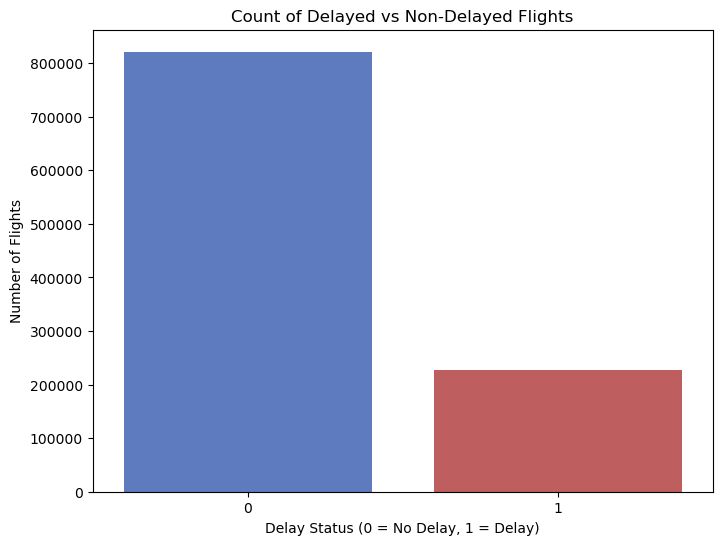

In [425]:
#Delayed vs. Non-Delayed flights
plt.figure(figsize=(8, 6))
sns.countplot(x='is_delay', data=flight, palette=['#4e75cf', '#cf4e4e'])
plt.title('Count of Delayed vs Non-Delayed Flights')
plt.xlabel('Delay Status (0 = No Delay, 1 = Delay)')
plt.ylabel('Number of Flights')
plt.show()


#### Non-delayed flight ratio is higher than the delayed flight.

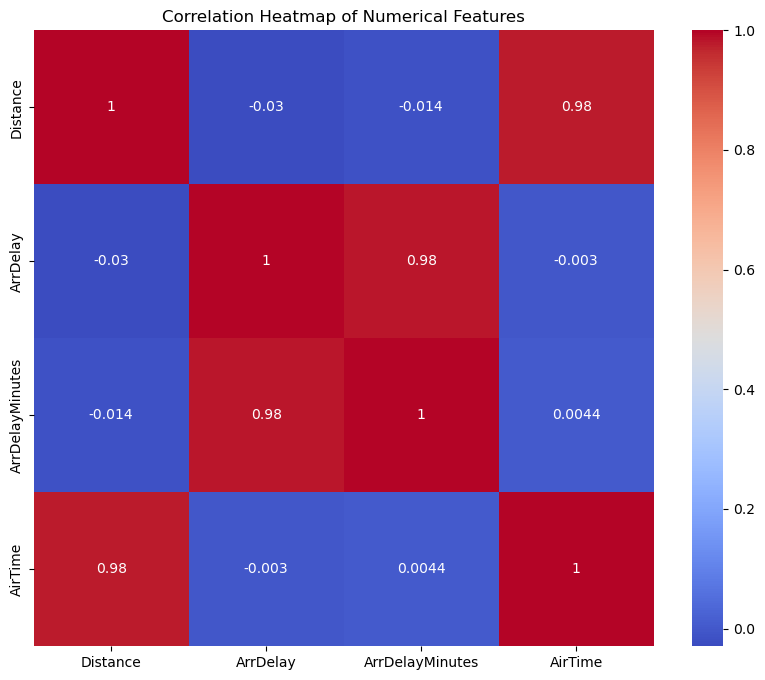

In [432]:
#Correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(flight[['Distance', 'ArrDelay', 'ArrDelayMinutes', 'AirTime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

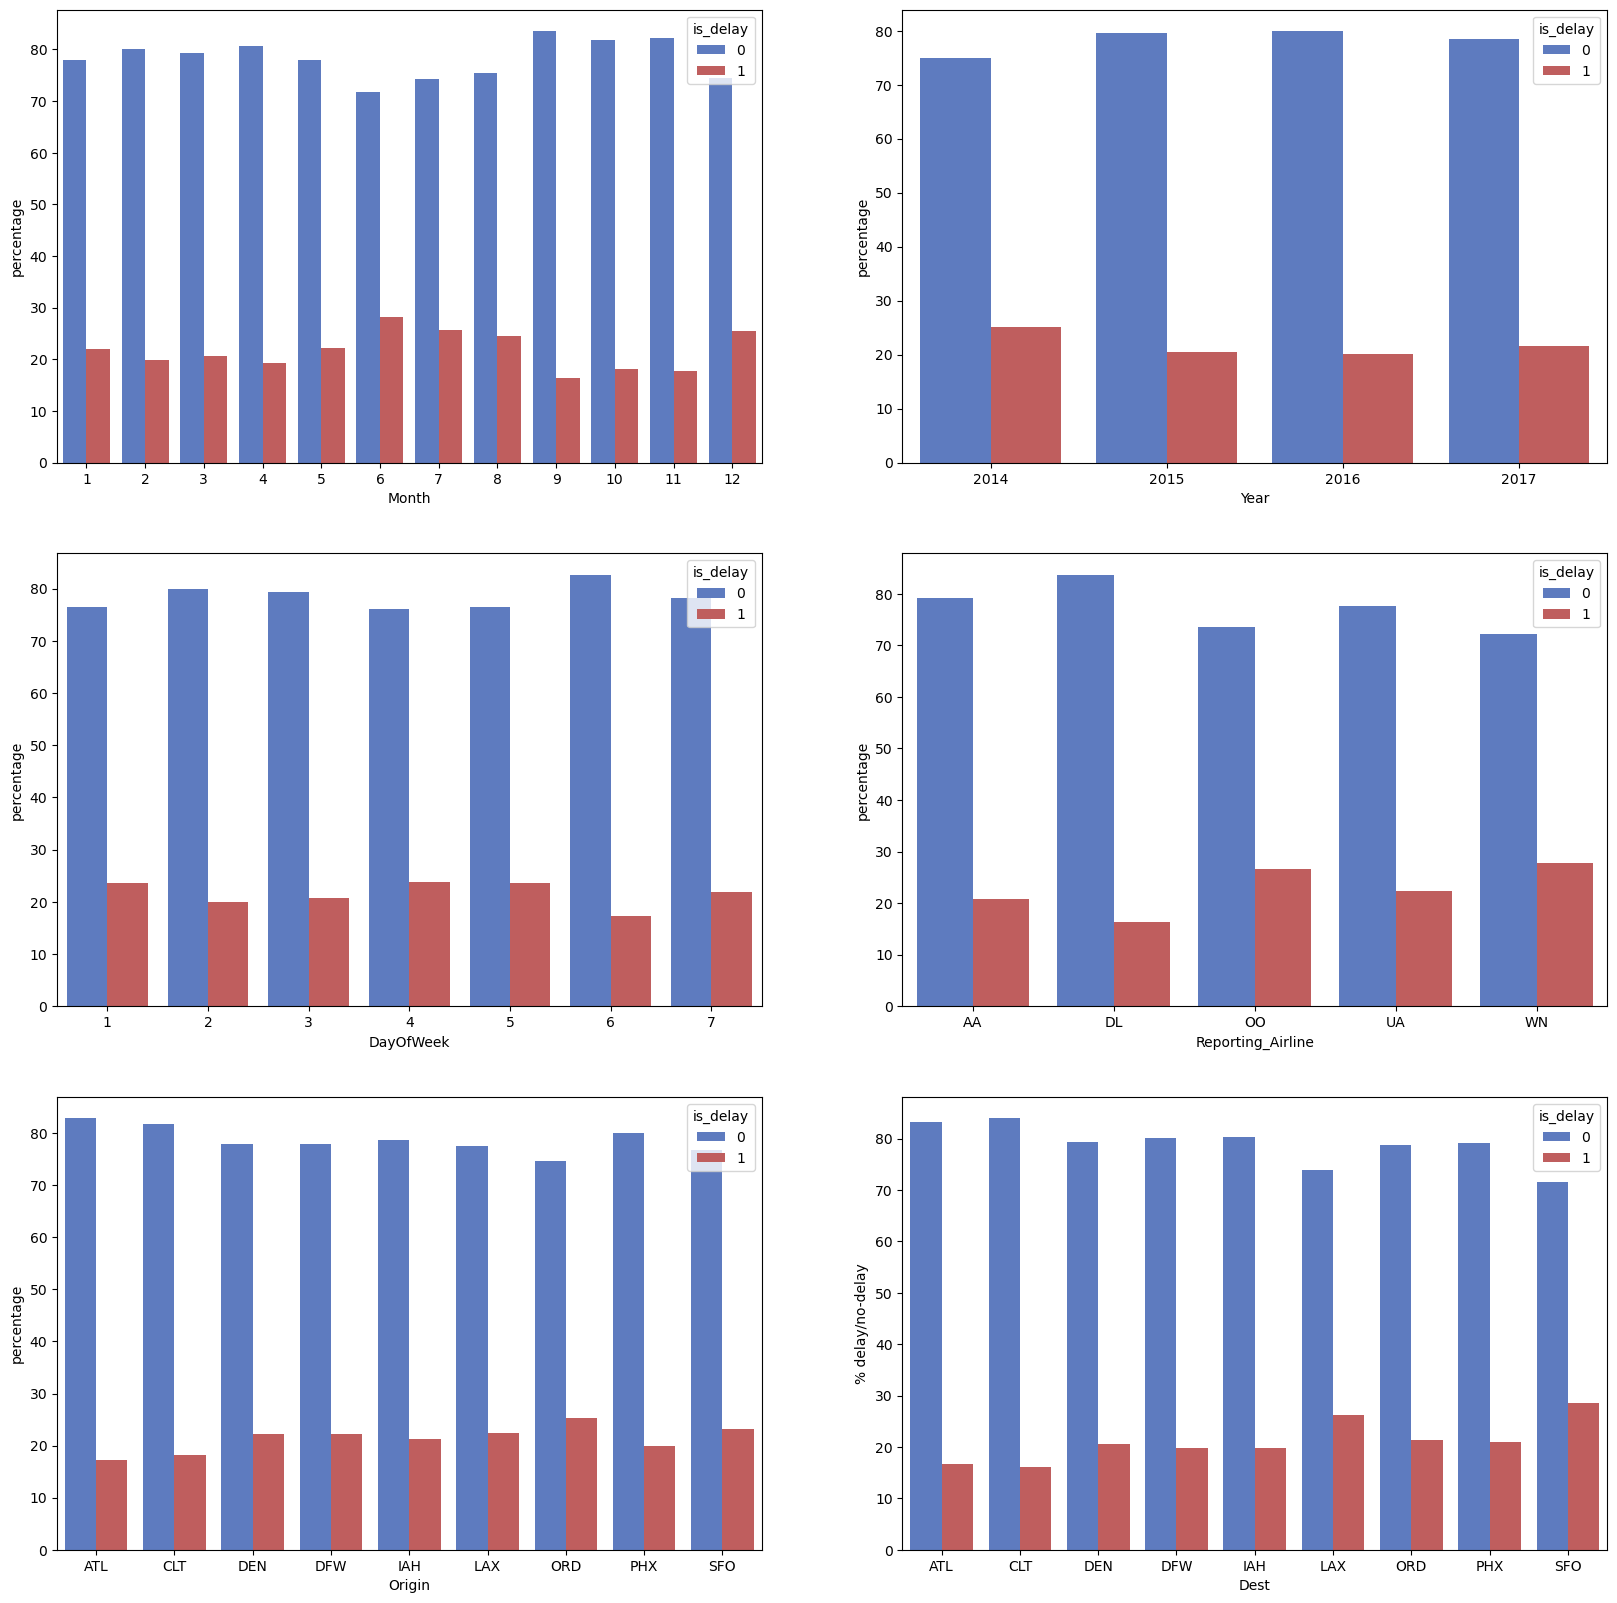

In [248]:

columns = ['Month', 'Year', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)


for idx, column in enumerate(columns):
    ax = axes[idx//2, idx%2]
    temp = flight.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax, palette=['#4e75cf', '#cf4e4e'])
    plt.ylabel('% delay/no-delay')

plt.show()

* June is the highest delay month.
* In 2014, flights were delayed more often than at any other time that year.
* The 1st, 2nd, and 5th Day of weeks have the highest number of delayed flights.
* OO and WN airlines have the most delayed flight.
* ORD: Chicago has the highest number of delayed flights among all origin airports.
* SFO: San Francisco has the highest number of delayed flights among all the destination airports.

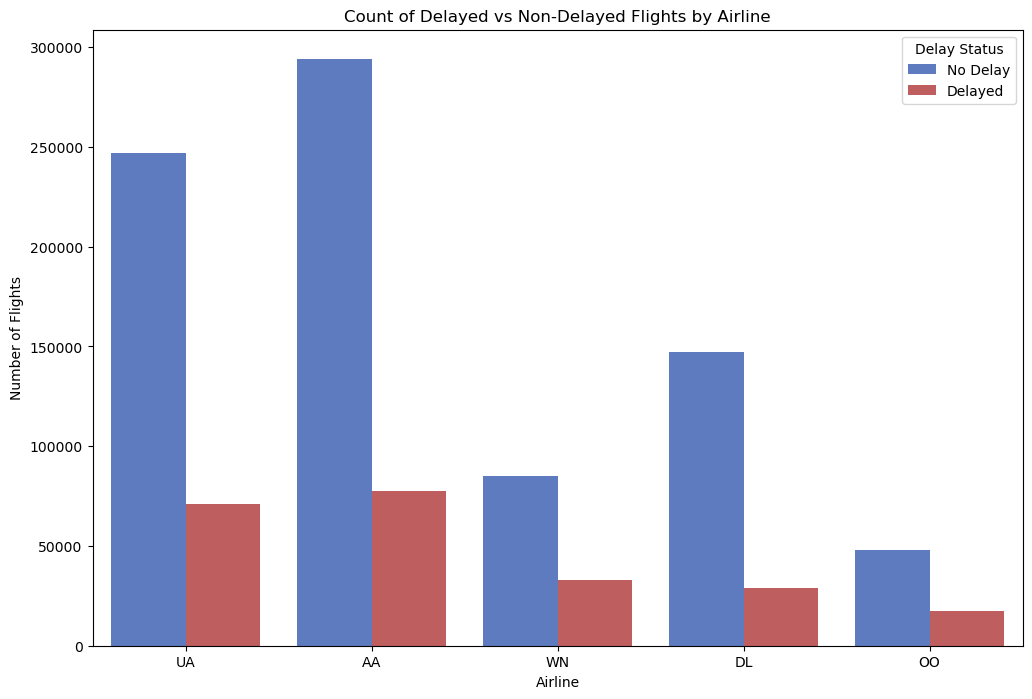

In [456]:
plt.figure(figsize=(12, 8))
sns.countplot( x='Reporting_Airline', hue='is_delay', data=flight, palette=['#4e75cf', '#cf4e4e'])
plt.title('Count of Delayed vs Non-Delayed Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.legend(title='Delay Status', labels=['No Delay', 'Delayed'])
plt.show()

#### American Airlines Inc. experiences more flight delays than other airlines.

In [ ]:

# 'AA': 'American Airlines Inc.'
#  'DL': 'Delta Air Lines Inc.'
#  'OO': 'Skywest Airlines Inc.'
#  'UA': 'United Air Lines Inc.'
#  'WN': 'Southwest Airlines Co.'

#### Dropping FlightDate column as we have Year, Quarter, Month, DayofMonth, DayofWeek columns.
#### The Origin and Dest codes are more useful than OriginState and DestState
#### Since I'm only going to classify whether the flight is delayed or not, I don't need the ArrDelayMinutes,DistanceGroup,ArrDelay column.
#### Droping Cancelled and Diverted columns as they don't hold any records.

In [462]:
flight["Diverted"].value_counts()

Diverted
0    1048575
Name: count, dtype: int64

In [464]:
flight["Cancelled"].value_counts()

Cancelled
0    1048575
Name: count, dtype: int64

In [466]:

flight=flight.drop(["FlightDate","OriginState","DestState","ArrDelayMinutes","ArrDelay","Cancelled","Diverted","DistanceGroup"],axis=1)


In [468]:
flight

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,CRSDepTime,Distance,AirTime
0,1,2014,1,1,1,3,UA,LAX,ORD,900,1744,218
1,0,2014,1,1,1,3,AA,IAH,DFW,1750,224,50
2,1,2014,1,1,1,3,AA,LAX,ORD,1240,1744,220
3,1,2014,1,1,1,3,AA,DFW,LAX,1905,1235,169
4,0,2014,1,1,1,3,AA,DFW,CLT,1115,936,108
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,2017,2,4,15,6,OO,IAH,DFW,1535,224,45
1048571,0,2017,2,4,15,6,OO,DFW,SFO,745,1464,203
1048572,0,2017,2,4,15,6,AA,CLT,LAX,735,2125,277
1048573,0,2017,2,4,15,6,AA,ORD,DFW,840,802,110


### Data Preprocessing

## Using Label Encoder for converting categorical features into numerical features

In [476]:
flight_categorical = flight.select_dtypes(['object'])
flight_categorical

,Reporting_Airline,Origin,Dest
0,UA,LAX,ORD
1,AA,IAH,DFW
2,AA,LAX,ORD
3,AA,DFW,LAX
4,AA,DFW,CLT
...,...,...,...
1048570,OO,IAH,DFW
1048571,OO,DFW,SFO
1048572,AA,CLT,LAX
1048573,AA,ORD,DFW


In [478]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for feature in flight_categorical:
    flight_categorical[feature] = LE.fit_transform(flight_categorical[feature])


In [480]:
flight_categorical

,Reporting_Airline,Origin,Dest
0,3,5,6
1,0,4,3
2,0,5,6
3,0,3,5
4,0,3,1
...,...,...,...
1048570,2,4,3
1048571,2,3,8
1048572,0,1,5
1048573,0,6,3


### Scaling Numerical data

In [488]:
flight_num = flight[["Year","Quarter","Month","DayofMonth","DayOfWeek","CRSDepTime","Distance","AirTime"]]
flight_num

,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,Distance,AirTime
0,2014,1,1,1,3,900,1744,218
1,2014,1,1,1,3,1750,224,50
2,2014,1,1,1,3,1240,1744,220
3,2014,1,1,1,3,1905,1235,169
4,2014,1,1,1,3,1115,936,108
...,...,...,...,...,...,...,...,...
1048570,2017,2,4,15,6,1535,224,45
1048571,2017,2,4,15,6,745,1464,203
1048572,2017,2,4,15,6,735,2125,277
1048573,2017,2,4,15,6,840,802,110


In [490]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
SC = StandardScaler()


for i in flight_num:
    flight_num[i] = SC.fit_transform(flight_num[[i]])

In [492]:
flight_num

,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,Distance,AirTime
0,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,-0.838933,1.375190,1.327421
1,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,0.877260,-1.459549,-1.325553
2,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,-0.152456,1.375190,1.359005
3,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,1.190213,0.425926,0.553637
4,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,-0.404837,-0.131697,-0.409645
...,...,...,...,...,...,...,...,...
1048570,1.831387,-0.382064,-0.655626,-0.071398,1.043511,0.443164,-1.459549,-1.404511
1048571,1.831387,-0.382064,-0.655626,-0.071398,1.043511,-1.151886,0.853001,1.090549
1048572,1.831387,-0.382064,-0.655626,-0.071398,1.043511,-1.172076,2.085740,2.259121
1048573,1.831387,-0.382064,-0.655626,-0.071398,1.043511,-0.960076,-0.381602,-0.378062


# Concatenate the Numerical and Categorical Data

In [501]:
Flight_new=pd.concat((flight_num,flight_categorical,flight["is_delay"]),axis=1)

In [503]:
Flight_new

,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,Distance,AirTime,Reporting_Airline,Origin,Dest,is_delay
0,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,-0.838933,1.375190,1.327421,3,5,6,1
1,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,0.877260,-1.459549,-1.325553,0,4,3,0
2,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,-0.152456,1.375190,1.359005,0,5,6,1
3,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,1.190213,0.425926,0.553637,0,3,5,1
4,-1.327308,-1.262359,-1.514394,-1.666150,-0.466407,-0.404837,-0.131697,-0.409645,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.831387,-0.382064,-0.655626,-0.071398,1.043511,0.443164,-1.459549,-1.404511,2,4,3,0
1048571,1.831387,-0.382064,-0.655626,-0.071398,1.043511,-1.151886,0.853001,1.090549,2,3,8,0
1048572,1.831387,-0.382064,-0.655626,-0.071398,1.043511,-1.172076,2.085740,2.259121,0,1,5,0
1048573,1.831387,-0.382064,-0.655626,-0.071398,1.043511,-0.960076,-0.381602,-0.378062,0,6,3,0


## Split Features and Target data

In [505]:
y=Flight_new["is_delay"]
y

0          1
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: is_delay, Length: 1048575, dtype: int64

In [338]:
x=flight.drop("is_delay",axis=1)
x

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,CRSDepTime,Distance,AirTime
0,2014,1,1,1,3,UA,LAX,ORD,900,1744,218
1,2014,1,1,1,3,AA,IAH,DFW,1750,224,50
2,2014,1,1,1,3,AA,LAX,ORD,1240,1744,220
3,2014,1,1,1,3,AA,DFW,LAX,1905,1235,169
4,2014,1,1,1,3,AA,DFW,CLT,1115,936,108
...,...,...,...,...,...,...,...,...,...,...,...
1048570,2017,2,4,15,6,OO,IAH,DFW,1535,224,45
1048571,2017,2,4,15,6,OO,DFW,SFO,745,1464,203
1048572,2017,2,4,15,6,AA,CLT,LAX,735,2125,277
1048573,2017,2,4,15,6,AA,ORD,DFW,840,802,110


## Check if Dependent variable is balanced or not

<Axes: ylabel='count'>

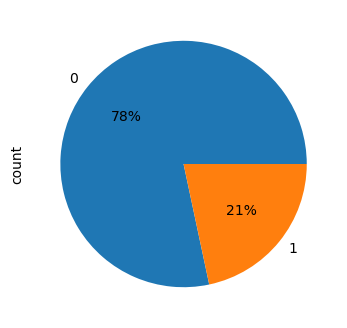

In [350]:
fig = plt.figure(figsize=(4,4))
y.value_counts().plot.pie(autopct='%1i%%')

As we can see above, percentage of delayed to not-delayed is 78:21. ratio is out of balance,Therefore it does require Imbalanced Data handling to overcome this.

In [352]:
from imblearn.over_sampling import SMOTE

In [354]:
smt = SMOTE()
x,y = smt.fit_resample(x,y)

<Axes: ylabel='count'>

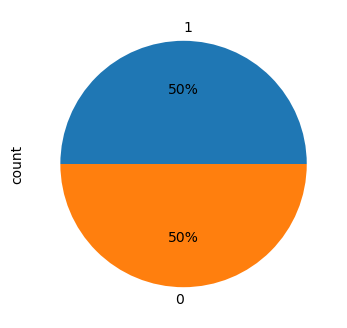

In [515]:
fig = plt.figure(figsize=(4,4))
y.value_counts().plot.pie(autopct='%1i%%')

#### As per the obesrvation data is now balanced perfectly

### Now the Data is cleaned and can be used for training.
### Splitting the dataset into train and test data.

In [517]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 2)

In [519]:
y_train.value_counts()

is_delay
0    575287
1    574747
Name: count, dtype: int64

In [521]:
pd.Series(y_test).value_counts()

is_delay
1    246706
0    246166
Name: count, dtype: int64

## Model Evaluation

### LogisticRegression

In [523]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [525]:
LR = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg')
LR.fit(x_train, y_train)

# Predict on test data
y_pred_Log = LR.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print('Test Model (Logistic Regression):')
Test_accuracy=accuracy_score(y_test, y_pred_Log)*100
print('Accuracy of LogisticRegression:', round(Test_accuracy,2),"%")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred_Log)


print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Test Model (Logistic Regression):
Accuracy of LogisticRegression: 60.49 %
Confusion Matrix:
[[195400  50766]
 [ 45788 200918]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.61      0.60    246166
           1       0.61      0.60      0.60    246706

    accuracy                           0.60    492872
   macro avg       0.60      0.60      0.60    492872
weighted avg       0.60      0.60      0.60    492872



In [527]:
# predict data train
y_train_pred_log = LR.predict(x_train)

# print classification report

print('Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.61      0.61      0.61    575287
           1       0.61      0.61      0.61    574747

    accuracy                           0.61   1150034
   macro avg       0.61      0.61      0.61   1150034
weighted avg       0.61      0.61      0.61   1150034



In [529]:
# ROC scores
from sklearn.metrics import roc_auc_score
roc_auc_log = roc_auc_score(y_test, y_pred_Log)
print('ROC AUC LOG:', roc_auc_log)

ROC AUC LOG: 0.6048578385784192


In [531]:
acc_log_train=round(LR.score(x_train,y_train)*100,2)
acc_log_test=round(LR.score(x_test,y_test)*100,2)
print("Training Accuracy:  {} %".format(acc_log_train))
print("Test Accuracy:  {} %".format(acc_log_test))

Training Accuracy:  60.65 %
Test Accuracy:  60.49 %


In [230]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver':['poly','lbfgs','saga','sag','newton-cg'],'penalty':['none','l1','l2','elasticent'],'C':[100,10,1,0.1,0.01]}
#{'max_depth': [5,9,13], 'min_samples_split': [3,4],'min_samples_leaf': [2,3]}
#               {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = LR,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,verbose=3)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END ....C=100, penalty=none, solver=poly;, score=nan total time=   1.7s
[CV 2/3] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.4s
[CV 3/3] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.2s
[CV 1/3] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.1s
[CV 2/3] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.2s
[CV 3/3] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.2s
[CV 1/3] END ....C=100, penalty=none, solver=saga;, score=nan total time=   0.1s
[CV 2/3] END ....C=100, penalty=none, solver=saga;, score=nan total time=   0.2s
[CV 3/3] END ....C=100, penalty=none, solver=saga;, score=nan total time=   0.2s
[CV 1/3] END .....C=100, penalty=none, solver=sag;, score=nan total time=   0.1s
[CV 2/3] END .....C=100, penalty=none, solver=sag;, score=nan total time=   0.1s
[CV 3/3] END .....C=100, penalty=none, solver=

GridSearchCV(cv=3, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticent'],
                         'solver': ['poly', 'lbfgs', 'saga', 'sag',
                                    'newton-cg']},
             scoring='accuracy', verbose=3)

In [232]:

best_parameters = grid_search.best_params_
best_parameters

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

###  Decision Tree

In [535]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
classifierDT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [537]:
# Predicting the Test set results
y_test_pred = classifierDT.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
score = classifierDT.score(x_test,y_test)
classification_rep = classification_report(y_test, y_test_pred)

print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{classification_rep}')



Confusion Matrix:
[[194708  51458]
 [ 46453 200253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    246166
           1       0.80      0.81      0.80    246706

    accuracy                           0.80    492872
   macro avg       0.80      0.80      0.80    492872
weighted avg       0.80      0.80      0.80    492872



In [539]:
# Predicting the Train set results
y_train_pred = classifierDT.predict(x_train)

# Making the Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
score = classifierDT.score(x_train,y_train)
classification_rep = classification_report(y_train, y_train_pred)

print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{classification_rep}')

Confusion Matrix:
[[575287      0]
 [     2 574745]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    575287
           1       1.00      1.00      1.00    574747

    accuracy                           1.00   1150034
   macro avg       1.00      1.00      1.00   1150034
weighted avg       1.00      1.00      1.00   1150034



In [541]:
# ROC scores
from sklearn.metrics import roc_auc_score
roc_auc_log = roc_auc_score(y_test, y_test_pred)
print('ROC AUC LOG:',roc_auc_log)

ROC AUC LOG: 0.8013346241801385


In [543]:
acc_rf_train=round(classifierDT.score(x_train,y_train)*100,2)
acc_rf_test=round(classifierDT.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 100.0 %
Test Accuracy: 80.13 %


##  Random Forest

In [546]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
# train the model
RF.fit(x_train, y_train)


# predict train data
y_train_pred_rf = RF.predict(x_train)
classification_report=classification_report(y_train, y_train_pred_rf)
# Making the Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred_rf)
# print classification report
print('Training Model (Random Forest):')
print(f"classification_report:\n {classification_report}")


Training Model (Random Forest):
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    575287
           1       1.00      1.00      1.00    574747

    accuracy                           1.00   1150034
   macro avg       1.00      1.00      1.00   1150034
weighted avg       1.00      1.00      1.00   1150034



In [548]:
# predict test data
y_test_pred_rf = RF.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report

classification_report=classification_report(y_test, y_test_pred_rf)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
# print classification report
print('Testing Model (Random Forest):')
print(f'confusion_matrix:\n{cm}')    
print(f"classification_report:\n {classification_report}")

Testing Model (Random Forest):
confusion_matrix:
[[227026  19140]
 [ 36954 209752]]
classification_report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89    246166
           1       0.92      0.85      0.88    246706

    accuracy                           0.89    492872
   macro avg       0.89      0.89      0.89    492872
weighted avg       0.89      0.89      0.89    492872



In [550]:
# ROC scores
from sklearn.metrics import roc_auc_score
roc_auc_log = roc_auc_score(y_test, y_test_pred_rf)
print('ROC AUC LOG:',roc_auc_log)

ROC AUC LOG: 0.8862289804424572


In [552]:
acc_rf_train=round(RF.score(x_train,y_train)*100,2)
acc_rf_test=round(RF.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 100.0 %
Test Accuracy: 88.62 %


## KNN 

In [555]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=5,metric='manhattan')
Knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [558]:
# predict train 
from sklearn.metrics import confusion_matrix, classification_report
y_train_pred_Knn = Knn.predict(x_train)
#classification_report=classification_report(y_train, y_train_pred_Knn)

# Making the Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred_rf)

#classification report
print('Training Model (Random Forest):')
print(f'confusion_matrix:\n{cm}')
#print(f"classification_report:\n {classification_report}")

Training Model (Random Forest):
confusion_matrix:
[[575286      1]
 [    10 574737]]


In [162]:
# predict test data
y_test_pred_Knn = Knn.predict(x_test)
classification_report=classification_report(y_test, y_test_pred_Knn)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_Knn)

#classification report
print('Test Model (Random Forest):')
print(f'confusion_matrix:\n{cm}')
print(f"classification_report:\n {classification_report}")

Test Model (Random Forest):
confusion_matrix:
[[180742  65424]
 [ 31105 215601]]
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79    246166
           1       0.77      0.87      0.82    246706

    accuracy                           0.80    492872
   macro avg       0.81      0.80      0.80    492872
weighted avg       0.81      0.80      0.80    492872



In [167]:
# ROC scores
from sklearn.metrics import roc_auc_score
roc_auc_log = roc_auc_score(y_test, y_test_pred_Knn)
print('ROC AUC LOG:', roc_auc_log)

ROC AUC LOG: 0.8040734379912582


In [568]:
acc_Knn_train=round(Knn.score(x_train,y_train)*100,2)
acc_Knn_test=round(Knn.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_Knn_train))
print("Test Accuracy: {} %".format(acc_Knn_test))

Training Accuracy: 87.99 %
Test Accuracy: 80.41 %


## Model Comparison

### Using Training and Testing Accuracy

| Algorithm | Training Accuracy | Testing Accuracy |
| :-: | :-: | :-: |
| Logistic Regression | 60.65 % | 60.49% |
| Decision Tree | 100.0% | 80.13% |
| Random Forest | 100.0% | 88.62% |
| KNeighborsClassifier | 87.99% | 80.41% |

### Using ROC AUC Score

| Algorithm | ROC AUC Score |
| :-: | :-: |
| Logistic Regression | 0.60 | 
| Decision Tree | 0.80 | 
| Random Forest | 0.88 |
| KNeighborsClassifier | 0.80 | 

## Conclusion

In model comparison, we can observe that based on the analysis conducted using logistic regression, KNeighnorsClassifier, Decision tree and Random Forest algorithms for Flight Delay, it has been observed that Random Forest achieved the highest accuracy in terms of Training and testing accuracy as well as ROC AUC Score among these models.Therefore, Random Forest algorithm appears to be the most suitable model for predicting Flight Delay.